In [82]:
from   sklearn.model_selection import train_test_split
from   sklearn.preprocessing   import MinMaxScaler
from   sklearn.linear_model    import LinearRegression
from   sklearn.metrics         import mean_squared_error, r2_score
import pandas                  as     pd
import numpy                   as     np
import seaborn                 as     sns
import matplotlib.pyplot       as     plt

# Dummy Encoding

In [83]:
medals = pd.read_pickle('../dat/medals.pkl')
medals.head()

,Year,Summer,Games,Host,NOC,Athletes,Females,Sports,Events,Medals,Golds,Silvers,Bronzes
0,1896,1,1896 Summer,0,AUS,5,0,2,5,3,2,0,1
1,1896,1,1896 Summer,0,AUT,8,0,3,8,5,2,1,2
2,1896,1,1896 Summer,0,DEN,15,0,5,12,6,1,2,3
3,1896,1,1896 Summer,0,FRA,26,0,6,18,11,5,4,2
4,1896,1,1896 Summer,0,GBR,25,0,7,19,9,3,3,3


In [84]:
# create dummy variables
model = pd.get_dummies(data=medals, columns=['NOC'])
model.head()

,Year,Summer,Games,Host,Athletes,Females,Sports,Events,Medals,Golds,...,NOC_VIE,NOC_VIN,NOC_VNM,NOC_WIF,NOC_YAR,NOC_YEM,NOC_YMD,NOC_YUG,NOC_ZAM,NOC_ZIM
0,1896,1,1896 Summer,0,5,0,2,5,3,2,...,0,0,0,0,0,0,0,0,0,0
1,1896,1,1896 Summer,0,8,0,3,8,5,2,...,0,0,0,0,0,0,0,0,0,0
2,1896,1,1896 Summer,0,15,0,5,12,6,1,...,0,0,0,0,0,0,0,0,0,0
3,1896,1,1896 Summer,0,26,0,6,18,11,5,...,0,0,0,0,0,0,0,0,0,0
4,1896,1,1896 Summer,0,25,0,7,19,9,3,...,0,0,0,0,0,0,0,0,0,0


In [85]:
# Correlation

# Train Test Split

In [87]:
y = pd.DataFrame(model['Medals'])
y.head()

,Medals
0,3
1,5
2,6
3,11
4,9


In [71]:
X = model.drop(['Medals','Games','Golds','Silvers','Bronzes'], axis=1)
X.head()

,Year,Summer,Host,Athletes,Females,Sports,Events,NOC_AFG,NOC_AHO,NOC_ALB,...,NOC_VIE,NOC_VIN,NOC_VNM,NOC_WIF,NOC_YAR,NOC_YEM,NOC_YMD,NOC_YUG,NOC_ZAM,NOC_ZIM
0,1896,1,0,5,0,2,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1896,1,0,8,0,3,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1896,1,0,15,0,5,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1896,1,0,26,0,6,18,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1896,1,0,25,0,7,19,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
# Scaling
scaler = MinMaxScaler()
scaler.fit(X)
scaler.transform(X)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 1., 0.],
       [1., 1., 0., ..., 0., 0., 1.]])

# Linear Regression

In [73]:
# Create linear regression object
regr = LinearRegression()

In [74]:
# Train the model using the training sets
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [90]:
# Make predictions using the testing set
y_pred = pd.DataFrame(regr.predict(X), columns=['Prediction'])
y_pred['Prediction'] = y_pred['Prediction'].astype('int64')
y_pred.head()

,Prediction
0,1
1,-2
2,4
3,-12
4,-7


In [98]:
y['Prediction'] = y_pred['Prediction']
y['NOC']        = medals['NOC']
y['Error']      = y['Medals'] - y['Prediction']
y               = y.sort_values(by='Medals', ascending=False)
y

,Medals,Prediction,NOC,Error
1476,442,226,URS,216
57,394,331,USA,63
88,368,250,GBR,118
1653,352,189,USA,163
3245,317,207,USA,110
1855,300,215,URS,85
1360,286,201,URS,85
3828,264,197,USA,67
1427,264,157,GDR,107
2962,263,194,USA,69


# Validation

In [105]:
X.columns

Index(['Year', 'Summer', 'Host', 'Athletes', 'Females', 'Sports', 'Events',
       'NOC_AFG', 'NOC_AHO', 'NOC_ALB',
       ...
       'NOC_VIE', 'NOC_VIN', 'NOC_VNM', 'NOC_WIF', 'NOC_YAR', 'NOC_YEM',
       'NOC_YMD', 'NOC_YUG', 'NOC_ZAM', 'NOC_ZIM'],
      dtype='object', length=237)

In [107]:
# The coefficients
features = pd.DataFrame(regr.coef_.T, columns=['Coefficients'])
features['Feature'] = X.columns.T
features = features.sort_values(by='Coefficients', ascending=False)
features

,Coefficients,Feature
221,72.215680,NOC_URS
73,44.174049,NOC_EUN
83,41.310428,NOC_GDR
223,26.070954,NOC_USA
21,8.182489,NOC_AZE
14,7.258854,NOC_ANZ
84,7.192083,NOC_GEO
182,6.978883,NOC_SCG
57,6.801143,NOC_CRO
192,6.242823,NOC_SRB


In [56]:
regr.intercept_

array([28.01808495])

In [57]:
regr.score(X,y)

0.8221411313926411

In [58]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y, y_pred))

Variance score: 0.82


In [59]:
# The mean squared error
print("Mean squared error: %.2f" % np.sqrt(mean_squared_error(y, y_pred)))

Mean squared error: 12.80


# Predictions

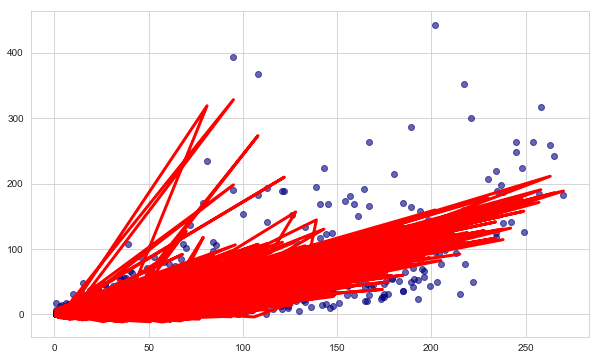

In [35]:
# Plot outputs
plt.figure(figsize = (10,6))
sns.set_style("whitegrid")
plt.scatter(X['Events'], y, c='navy', alpha=0.6)
plt.plot(X['Events'], y_pred, color='red', linewidth=3)
plt.show()